# PHASE 1: Importing and Preparing Data
Importing the data into a dataframe, and extract the following columns then removing leading and trailing white-spaces from the selected columns. Converting data to suitable data types and other data preparational steps.

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [273]:
df = pd.read_csv('aviation_data.csv', sep='|', header=0, skiprows=[0], dtype=str)

# Remove leading and trailing white-spaces
df.columns = df.columns.str.strip()

# additional: stripping values of strings and uppercasing them
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(
    include=['object']).apply(lambda x: x.str.strip())
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(
    include=['object']).apply(lambda x: x.str.upper())

# convert their data to suitable data types
df[['Event Date', 'Publication Date']] = df[
    ['Event Date', 'Publication Date']
  ].apply(pd.to_datetime)

df[['Latitude', 'Longitude', 'Total Fatal Injuries']] = df[
    ['Latitude', 'Longitude', 'Total Fatal Injuries']
  ].apply(pd.to_numeric)

df[['Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']] = df[
    ['Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']
  ].apply(pd.to_numeric)

# additional: replacing white-space with underscores in labels
df.columns = df.columns.str.replace(' ', '_')

# additional: drop nameless cols
df = df.drop('', axis=1)

# additional: fill NaNs with 'Unavailable' or 'Unknown'
df['Injury_Severity'].fillna('Unavailable', inplace=True)
df['Purpose_of_Flight'].fillna('Unknown', inplace=True)

# UNK and UNKN are also codes
df['Airport_Code'] = df['Airport_Code'].str.strip()
df['Airport_Code'].fillna('UNKNOWN', inplace=True)
df['Airport_Code'].replace(['', 'n/a', 'na', 'none'], 'UNKNOWN', inplace=True)
df['Airport_Code'] = df['Airport_Code'].str.upper()
df['Make'] = df['Make'].str.upper()
df

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Latitude                         float64
Longitude                        float64
Airport_Code                      object
Airport_Name                      object
Injury_Severity                   object
Aircraft_Damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                 object
Engine_Type                       object
FAR_Description                   object
Schedule                          object
Purpose_of_Flight                 object
Air_Carrier                       object
Total_Fatal_Injuries             float64
Total_Serious_In

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_Flight,Air_Carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status,Publication_Date
0,20200922X85131,ACCIDENT,CEN20LA412,2020-09-20,"MONTROSE, MO",UNITED STATES,38.250000,-93.890000,UNKNOWN,N/A,...,PERSONAL,,NaN,NaN,NaN,1.0,VMC,CRUISE,PRELIMINARY,2020-09-24
1,20200920X32151,ACCIDENT,WPR20CA313,2020-09-19,"SOMERTON, AZ",UNITED STATES,32.557222,-114.684166,AZ25,TRI-ROTOR AG SERVICES,...,OTHER WORK USE,,NaN,NaN,NaN,1.0,,,PRELIMINARY,2020-09-23
2,20200922X81021,ACCIDENT,CEN20WA408,2020-09-19,"MOOSBURG, GERMANY",GERMANY,NaN,NaN,UNKNOWN,,...,,,2.0,NaN,NaN,NaN,,MANEUVERING,FOREIGN,NaT
3,20200921X81023,ACCIDENT,CEN20CA405,2020-09-18,"HUNTLEY, IL",UNITED STATES,42.221111,-88.417778,6IL2,PHYLLIS FIELD,...,PERSONAL,,NaN,NaN,NaN,1.0,VMC,,PRELIMINARY,2020-09-21
4,20200921X15712,ACCIDENT,CEN20CA411,2020-09-17,"MARKSVILLE, LA",UNITED STATES,31.094722,-92.069167,MKV,,...,,,NaN,NaN,NaN,NaN,,,PRELIMINARY,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85622,20041105X01764,ACCIDENT,CHI79FA064,1979-08-02,"CANTON, OH",UNITED STATES,NaN,NaN,UNKNOWN,,...,PERSONAL,,1.0,2.0,NaN,NaN,VMC,APPROACH,PROBABLE CAUSE,1980-04-16
85623,20001218X45448,ACCIDENT,LAX96LA321,1977-06-19,"EUREKA, CA",UNITED STATES,NaN,NaN,UNKNOWN,,...,PERSONAL,,2.0,0.0,0.0,0.0,IMC,CRUISE,PROBABLE CAUSE,2000-09-12
85624,20061025X01555,ACCIDENT,NYC07LA005,1974-08-30,"SALTVILLE, VA",UNITED STATES,36.922223,-81.878056,UNKNOWN,,...,PERSONAL,,3.0,NaN,NaN,NaN,IMC,CRUISE,PROBABLE CAUSE,2007-02-26
85625,20001218X45447,ACCIDENT,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,NaN,NaN,UNKNOWN,,...,PERSONAL,,4.0,0.0,0.0,0.0,UNK,UNKNOWN,PROBABLE CAUSE,1996-09-19


## PHASE 2: Plotting Yearly Events

Calculating the number of airplane events that transpired each year and displaying the results using a line chart, in order to figure out which year had the highest number of events.

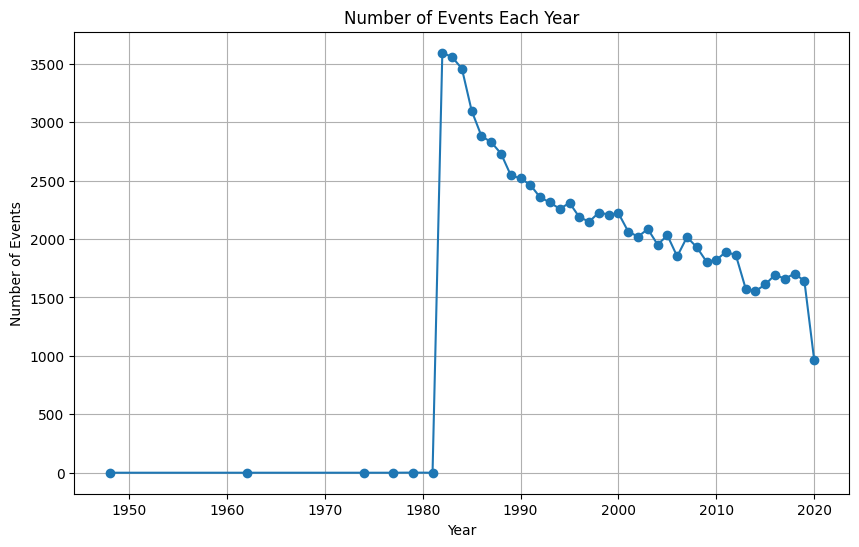

In [258]:
event_count_by_year = df['Event_Date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(event_count_by_year.index, event_count_by_year.values, marker='o', linestyle='-')
plt.title('Number of Events Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)

The year 1982 appears to have the highest number of events.

## PHASE 3: Visualizing Accident-Incident Proportions

A visualization that shows the proportion of Accidents and Incidents in the dataset.

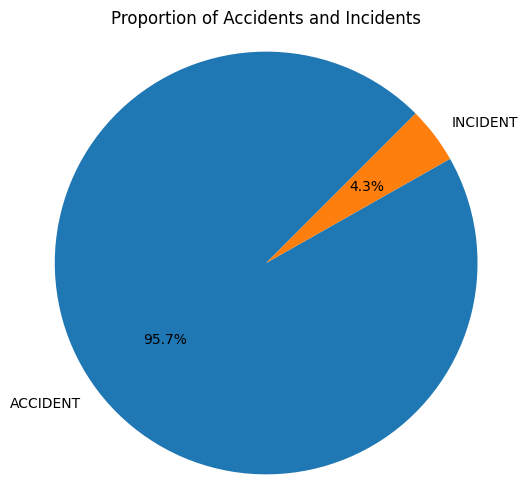

In [259]:
cleaned_df = df[df['Investigation_Type'] != '']
cleaned_df['Investigation_Type'].unique()

investigation_counts = cleaned_df['Investigation_Type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(investigation_counts, labels=investigation_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Proportion of Accidents and Incidents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


The pie chart reveals that the overwhelming majority, 95.7%, of the recorded Investigation Types are categorized as "Accidents," while only a small portion, 4.3%, fall under the classification of "Incidents." This stark contrast likely signifies that the dataset predominantly consists of events with severe consequences or outcomes, which merit the label of "Accidents." Conversely, "Incidents" are relatively rare, potentially involving less severe or harmful occurrences. The distribution could also reflect a strong focus on documenting and investigating accidents, with incidents being a smaller subset. The significance of this distribution should be explored further to understand its implications in terms of safety measures, risk assessment, or policy considerations within the context of the dataset.

## PHASE 4: Aggregation Based on Make

A visualization that calculates the number of events grouped by the aircraft make (e.g. Cessna, Boeing, Piper, etc). This will reveal which aircraft has the most events and will only show the top ten results.

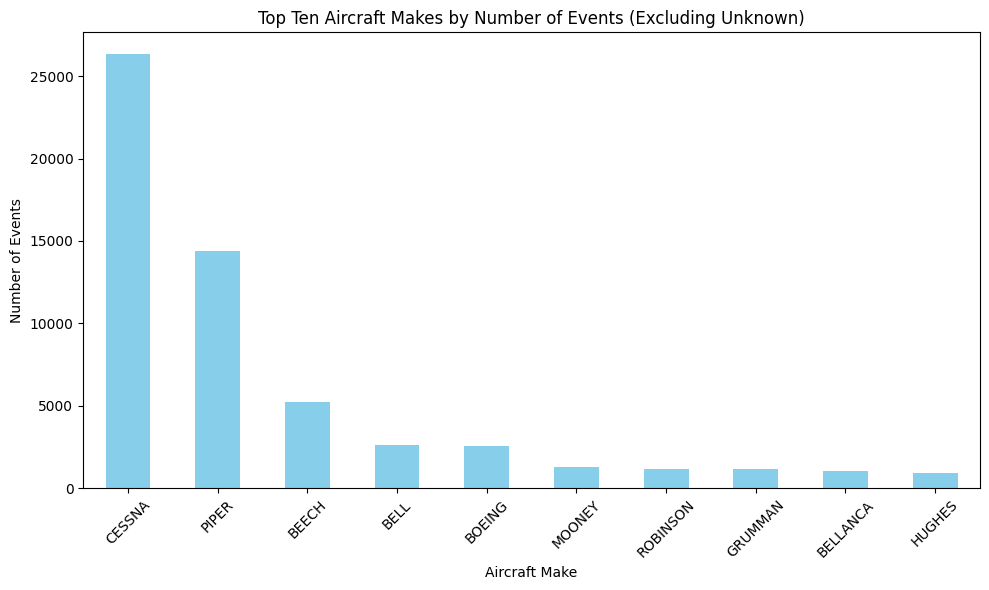

In [260]:
by_make_df = df[df['Make'] != 'UNKNOWN']
by_make_df = by_make_df[by_make_df['Make'] != 'NONE']

# Count the occurrences of each aircraft make and select the top ten
top_aircraft = by_make_df['Make'].value_counts().head(10)

# Create a bar chart to visualize the results
plt.figure(figsize=(10, 6))
top_aircraft.plot(kind='bar', color='skyblue')
plt.title('Top Ten Aircraft Makes by Number of Events (Excluding Unknown)')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

# Show the bar chart
plt.tight_layout()
plt.show()

The analysis of aircraft events by make reveals that CESSNA accounts for the highest number of events, with approximately 25000 occurrences. This make substantially outnumbers all others, indicating a significant presence in the dataset. In contrast, no other aircraft make comes close to CESSNA in terms of event frequency. PIPER ranks second highest, with around 15000 events, but it still lags far behind CESSNA. These findings suggest a potential area of focus for further investigation or safety measures, particularly regarding CESSNA aircraft.

## Question 5: Filtering and Exploring Boeing 737 Events

Filtering and extracting all events for Boeing 737-type aircrafts, then creating suitable visualizations to answer the following questions:
* What year had the most accidents?
* What Phase of Flight did most accidents transpire?
* Where most events were fatal or non-fatal?

In [ ]:
# Filter for Boeing 737 aircraft events
boeing_737_events = df[df['Make'] == 'BOEING']
boeing_737_events['Model'] = boeing_737_events['Model'].str.startswith('737')

(array([1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.,
        2020., 2025.]),
 [Text(1975.0, 0, '1975'),
  Text(1980.0, 0, '1980'),
  Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

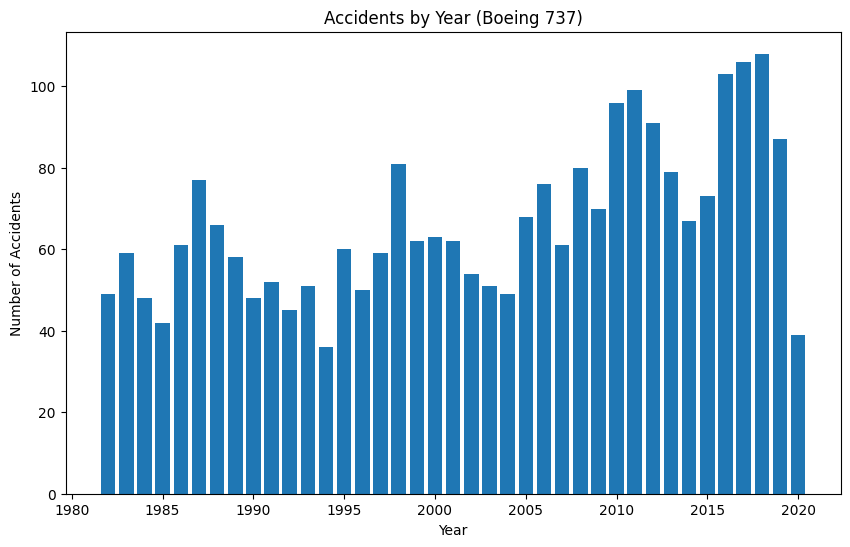

In [262]:
# Plot 1: Year with the most accidents
accidents_by_year = boeing_737_events['Event_Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(accidents_by_year.index, accidents_by_year.values)
plt.title('Accidents by Year (Boeing 737)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

The bar chart displays the distribution of accidents per year since 1980, with 2018 experiencing the highest number of accidents at approximately 160. The proximity of 2016 and 2017 with around 120 and 130 accidents, respectively, suggests a potential upward trend during that period. The drop in accidents in 2019, with only 86 incidents, could be attributed to improved safety measures, increased awareness, or changes in aviation regulations, signifying a possible positive impact on safety in that particular year.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'LANDING'),
  Text(1, 0, 'CRUISE'),
  Text(2, 0, 'TAXI'),
  Text(3, 0, 'TAKEOFF'),
  Text(4, 0, 'DESCENT'),
  Text(5, 0, 'STANDING'),
  Text(6, 0, 'APPROACH'),
  Text(7, 0, 'MANEUVERING'),
  Text(8, 0, 'CLIMB'),
  Text(9, 0, 'GO-AROUND')])

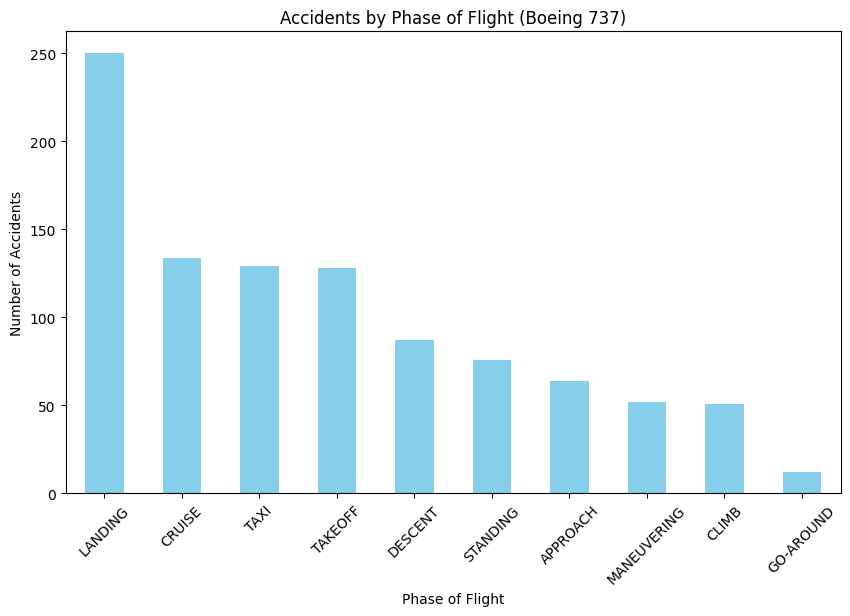

In [277]:
# Plot 2: Phase of Flight with the most accidents
boeing_737_events['Broad_Phase_of_Flight'].fillna('OTHER', inplace=True)
boeing_737_events['Broad_Phase_of_Flight'].replace(['', 'n/a', 'na', 'none', 'UNKNOWN'], 'OTHER', inplace=True)

boeing_737_events1 = boeing_737_events[boeing_737_events['Broad_Phase_of_Flight'] != 'OTHER']

phase_of_flight_counts = boeing_737_events1['Broad_Phase_of_Flight'].value_counts()

plt.figure(figsize=(10, 6))
phase_of_flight_counts.plot(kind='bar', color='skyblue')

plt.title('Accidents by Phase of Flight (Boeing 737)')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

The bar chart highlights that the majority of events involving Boeing 737 aircraft occur during the landing phase, accounting for approximately 250 events. This concentration could be attributed to the fact that the landing phase is one of the most critical and complex stages of flight, involving various factors like altitude, speed, and weather conditions. The higher number of events during landing suggests a higher potential for incidents in this phase, emphasizing the importance of stringent safety protocols and training for landing procedures.

Text(0.5, 1.0, 'Injury Severity Distribution (Boeing 737)')

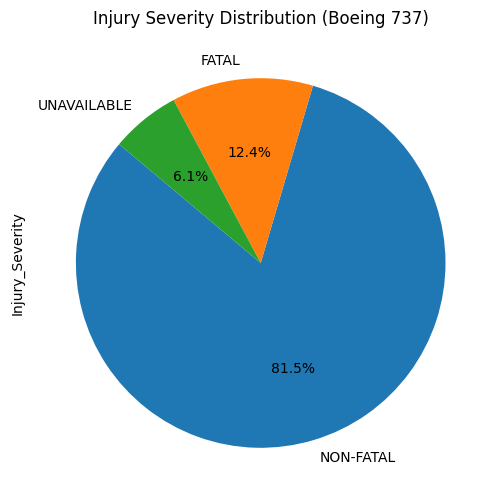

In [274]:
# Plot 3: Injury Severity distribution
# boeing_737_events['Injury_Severity'] = boeing_737_events['Injury_Severity'].str.replace('^FATAL', 'FATAL', regex=True)
boeing_737_events.loc[df['Injury_Severity'].str.startswith('FATAL'), 'Injury_Severity'] = 'FATAL'
boeing_737_events = boeing_737_events[boeing_737_events['Injury_Severity'] != 'INCIDENT']
injury_severity_counts = boeing_737_events['Injury_Severity'].value_counts()

plt.figure(figsize=(6, 6))
injury_severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Injury Severity Distribution (Boeing 737)')


The pie chart illustrates the distribution of Injury Severity among Boeing 737 aircraft events. The dominance of "Non-fatal" injuries, representing 81.5% of cases, suggests that the majority of incidents do not result in fatal consequences, indicating a generally high level of safety in Boeing 737 operations. The presence of "Fatal" injuries at 12.4% highlights the significance of implementing safety measures to further reduce such occurrences. The category "Unavailable" at 6.1% may indicate incomplete data or cases where injury information is not accessible for analysis.